## Evaluating regression techniques for speaker characterization
### Laura Fernández Gallardo

In this notebook, I explore the distributions of subjective ratings for speaker characteristics and voice descriptions.

In [1]:
import io
import requests

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# load data from URL
path = "https://raw.githubusercontent.com/laufergall/Subjective_Speaker_Characteristics/master/data/subjective_ratings/"

# load numeric labels from subjective listening (speaker characteristics)
url = path + "SC_ratings.csv"
s = requests.get(url).content
ratings_SC =pd.read_csv(io.StringIO(s.decode('utf-8')))

# load numeric labels from subjective listening (voice descriptions)
url = path + "VD_ratings.csv"
s = requests.get(url).content
ratings_VD =pd.read_csv(io.StringIO(s.decode('utf-8')))

# load subjective questionnaire items and their translations
url = path + "SC_Questionnaire.csv"
s = requests.get(url).content
quest_SC =pd.read_csv(io.StringIO(s.decode('utf-8')))

url = path + "VD_Questionnaire.csv"
s = requests.get(url).content
quest_VD =pd.read_csv(io.StringIO(s.decode('utf-8')))

In this exploratory analysis, let us look at:

* some ratings data summaries for speaker characteristics and for voice descriptions
* distribution of ratings for each trait
* aggregated numeric data labels


### Speaker characteristics (SC)

In [3]:
ratings_SC.head()

,listener_pseudonym,listener_age,listener_gender,listener_language,sample_heard,speaker_ID,speaker_pseudonym,speaker_gender,speaker_age,unsympathisch,...,freundlich,maennlich,gehorsam,gleichgueltig,interessant,zynisch,aufgesetzt,intelligent,kindlich,bescheiden
0,Rater001,23,male,Deutsch,m016_beirut_stimulus.wav,16,beirut,male,21,0,...,97,91,42,25,78,58,33,82,73,64
1,Rater001,23,male,Deutsch,m023_malabo_stimulus.wav,23,malabo,male,30,78,...,65,100,60,72,58,56,15,76,12,63
2,Rater001,23,male,Deutsch,m044_stanley_stimulus.wav,44,stanley,male,27,19,...,38,90,39,26,13,70,87,23,34,44
3,Rater001,23,male,Deutsch,m071_jamestown_stimulus.wav,71,jamestown,male,30,5,...,96,100,73,6,93,19,8,87,8,91
4,Rater001,23,male,Deutsch,m076_prague_stimulus.wav,76,prague,male,23,91,...,37,36,75,67,16,20,89,10,94,41


In [4]:
print("Number of speakers:",len(ratings_SC["speaker_ID"].unique())) # 300 speakers
print("Number of raters:",len(ratings_SC["listener_pseudonym"].unique())) # 114 listeners

Number of speakers: 300
Number of raters: 114


Each stimulus file corresponds to a different speaker, and has been labeled by external raters on 34 interpersonal speaker characteristics on a scale from 0 to 100 using a slider. A semantic differential questionnaire was used (more details [here](http://www.qu.tu-berlin.de/?id=nsc-corpus))

As an example, let us explore the ratings distributions given to one of the speakers (one of the most positively rated speakers).

In [5]:
# replace speaker characteristics by their English translation

# right adjective of the semantic differential, in German
sc_german = pd.DataFrame({'right_German':list(ratings_SC)[9:]})

# find indexes of the questionnaire
merged = sc_german.merge(quest_SC)

# replace item names
d = dict(zip(ratings_SC.columns[9:], merged["right_English"].values))
ratings_SC.rename(columns = d, inplace=True)

In [6]:
# Example of ratings_SC given to one of the 300 speakers

ratings_SC_alrayyan = ratings_SC[ratings_SC["speaker_pseudonym"]=="alrayyan"]
print(len(ratings_SC_alrayyan["listener_pseudonym"].unique()))  # 14 listeners provided ratings to this speaker   
ratings_SC_alrayyan

14


,listener_pseudonym,listener_age,listener_gender,listener_language,sample_heard,speaker_ID,speaker_pseudonym,speaker_gender,speaker_age,non_likable,...,friendly,masculine,submissive,indifferent,interesting,cynical,artificial,intelligent,childish,modest
285,Rater008,25,female,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,male,30,45,...,77,100,67,39,61,40,64,42,33,75
607,Rater016,25,male,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,male,30,34,...,87,73,82,37,37,25,63,71,12,74
687,Rater018,25,male,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,male,30,22,...,76,87,43,24,63,59,91,83,17,35
1447,Rater037,33,male,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,male,30,38,...,59,100,43,37,63,61,32,64,18,42
1601,Rater041,20,female,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,male,30,13,...,100,100,58,40,71,43,33,68,34,73
1759,Rater045,23,female,Schwedisch,m061_alrayyan_stimulus.wav,61,alrayyan,male,30,43,...,61,83,58,43,65,37,44,57,36,57
1841,Rater047,20,female,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,male,30,17,...,77,100,39,33,76,59,67,52,62,36
1916,Rater049,24,female,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,male,30,21,...,73,100,90,31,35,60,46,63,36,75
3241,Rater082,25,male,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,male,30,29,...,71,77,71,32,69,33,37,76,23,70
3684,Rater093,26,male,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,male,30,26,...,80,82,35,29,81,55,16,74,36,73


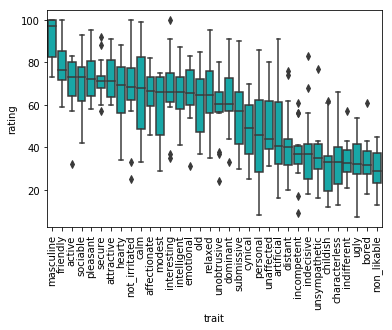

In [7]:
# sorting by columns median
ratings_SC_alrayyan = ratings_SC_alrayyan.reindex_axis(ratings_SC_alrayyan.iloc[:,9:].median().sort_values(ascending=False).index, axis=1)
  
# extracting ratings to each interpersonal trait (reshaping for plot)
traits = list(ratings_SC_alrayyan)
ratings_SC_alrayyan_melt = pd.melt(ratings_SC_alrayyan, id_vars=['listener_pseudonym'], value_vars=traits)
ratings_SC_alrayyan_melt.columns = ['listener_pseudonym','trait','rating']

# create plot
plot_alrayyan_SC = sns.boxplot(data = ratings_SC_alrayyan_melt, x = "trait", y = "rating", color="c")
plot_alrayyan_SC.set_xticklabels(traits,rotation=90);
plt.show()

I will consider the mean of the group of raters as the true label for each trait. A better way to do this would be to apply some multi-rater modeling technique to be able to extract a better ground truth - hopefully removing some subjectivity. 

In [8]:
# just keep speaker ID, gender, and rating in the dataframe
ratings_tmp = pd.concat([ratings_SC.iloc[:,[5,7]], ratings_SC.iloc[:,9:]], axis = 1)

# aggregate ratings by median for each trait separately
ratings_SC_means = ratings_tmp.groupby(['speaker_ID','speaker_gender']).agg('mean')
ratings_SC_medians = ratings_tmp.groupby(['speaker_ID','speaker_gender']).agg('median')
ratings_SC_std = ratings_tmp.groupby(['speaker_ID','speaker_gender']).agg('std')

ratings_SC_means.head()

,,non_likable,secure,attractive,unsympathetic,indecisive,unobtrusive,distant,bored,emotional,not_irritated,...,friendly,masculine,submissive,indifferent,interesting,cynical,artificial,intelligent,childish,modest
speaker_ID,speaker_gender,,,,,,,,,,,,,,,,,,,,,
1,female,36.571429,65.214286,59.785714,37.357143,33.714286,66.857143,35.642857,35.642857,52.000000,71.928571,...,75.428571,20.285714,59.000000,34.571429,60.571429,43.071429,35.785714,65.285714,46.857143,61.071429
2,female,66.666667,57.200000,39.333333,54.066667,33.066667,57.266667,56.466667,55.733333,50.866667,53.133333,...,55.600000,18.333333,55.133333,58.733333,38.533333,51.533333,63.200000,51.133333,33.533333,60.266667
3,female,45.812500,72.562500,47.125000,30.937500,27.937500,46.250000,38.625000,33.437500,59.750000,59.875000,...,64.125000,19.937500,46.437500,41.562500,55.562500,50.250000,40.687500,60.250000,14.437500,54.812500
4,male,40.071429,59.857143,44.571429,54.428571,35.071429,52.285714,48.571429,49.785714,45.714286,55.285714,...,51.428571,75.785714,47.071429,51.357143,49.142857,55.857143,38.071429,55.785714,40.500000,46.928571
5,male,42.117647,60.529412,53.823529,50.764706,35.705882,59.764706,49.764706,42.647059,46.235294,64.705882,...,54.176471,80.764706,47.823529,53.235294,57.352941,47.705882,35.823529,62.823529,29.294118,49.823529


In [9]:
ratings_SC_std.head()

,,non_likable,secure,attractive,unsympathetic,indecisive,unobtrusive,distant,bored,emotional,not_irritated,...,friendly,masculine,submissive,indifferent,interesting,cynical,artificial,intelligent,childish,modest
speaker_ID,speaker_gender,,,,,,,,,,,,,,,,,,,,,
1,female,25.922115,17.919386,26.876294,22.792061,22.706924,19.322594,21.080823,20.963731,21.408122,16.531854,...,16.841863,26.098714,22.250324,19.856076,20.909013,22.376032,24.179389,18.065814,19.825613,21.348624
2,female,18.495817,17.825343,23.113591,20.485070,14.776751,18.717702,22.821878,16.011008,20.120589,19.401276,...,18.976677,19.455688,15.918842,15.952907,15.361672,21.141924,23.358082,16.061785,16.830528,15.016499
3,female,22.777822,12.816493,24.196074,12.260880,13.183165,21.690244,18.032840,18.242693,21.526728,24.502721,...,21.948045,17.729331,17.959097,17.304985,22.529888,18.255593,23.107629,17.838161,13.913872,19.735649
4,male,18.565743,13.061141,14.324343,20.121608,10.417916,15.905628,19.290150,14.874752,12.814827,17.984731,...,18.562635,21.231974,13.758714,19.633594,14.453411,14.314367,17.459687,18.614215,12.049577,16.827013
5,male,18.096555,23.830437,18.872054,18.239824,22.126807,20.443610,17.246483,21.127415,15.880528,20.416797,...,20.341569,13.188676,21.210950,20.852246,21.130373,21.112096,16.989833,21.199161,16.162320,18.765778


In [10]:
# standard deviation averaged over speakers

ratings_SC_std.mean(axis = 0).sort_values().head()

masculine      17.220186
intelligent    17.604880
ugly           17.811317
old            18.047891
modest         18.276654
dtype: float64

In [11]:
# traits for which mean and median are generally closer

diffs = abs(ratings_SC_means.subtract(ratings_SC_medians))

diffs.mean(axis=0).sort_values().head()

ugly           2.741410
intelligent    2.759671
personal       2.846921
incompetent    2.955653
old            2.986538
dtype: float64

There is huge variation accross listeners in the provided ratings, which manifests the subjectivity of the task.

The ratings given to the traits: _intelligent_, _ugly_, _old_, _modest_, and _incompetent_  seem to present a "closer to normal" distribution with lower standard deviation. This can be seen as measures of agreement across listeners. 

In [13]:
# save labels dataframe 

ratings_SC_means.to_csv("../data/generated_data/ratings_SC_means.csv")
ratings_SC_medians.to_csv("../data/generated_data/ratings_SC_medians.csv")

### Voice descriptions (VD)

"ratings_VD" is a much smaller dataset. Only 20 out of the 300 speakers of the NSC database were selected that were extreme in the "warmth-attractiveness" (WAAT) space. These speakers were rated by a group of 26 listeners according to their voice characteristics.

I am interested in the relationships between voice descriptions and speaker characteristics - to be explored in this section.

In [14]:
ratings_VD.head()

,listener_pseudonym,listener_age,listener_gender,listener_language,sample_heard,speaker_ID,speaker_pseudonym,speaker_gender,speaker_age,speaker_dim1_SC,...,kurz,gepresst,kraftlos,stockend,hart,unprofessionell,unbetont,schrill,verbunden,behaucht
0,Rater115,26,m,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,m,30,3.309936,...,30,10,6,4,21,59,16,10,84,6
1,Rater115,26,m,Deutsch,m263_andorralavella_stimulus.wav,263,andorralavella,m,26,-4.861186,...,80,60,38,20,37,48,60,34,25,16
2,Rater115,26,m,Deutsch,m171_barentsburg_stimulus.wav,171,barentsburg,m,34,-5.175979,...,24,56,74,15,13,66,76,4,64,68
3,Rater115,26,m,Deutsch,m097_basseterre_stimulus.wav,97,basseterre,m,26,3.325969,...,76,13,23,9,30,12,19,12,74,28
4,Rater115,26,m,Deutsch,w040_birmingham_stimulus.wav,40,birmingham,w,29,2.806899,...,77,22,24,20,16,13,6,40,66,20


In [15]:
print("Number of speakers:",len(ratings_VD["speaker_ID"].unique())) # 300 speakers
print("Number of raters:",len(ratings_VD["listener_pseudonym"].unique())) # 114 listeners

Number of speakers: 20
Number of raters: 26


In [16]:
# replace speaker characteristics by their English translation

# right adjective of the semantic differential, in German
vd_german = pd.DataFrame({'right_German':list(ratings_VD)[15:]})

# find indexes of the questionnaire
merged = vd_german.merge(quest_VD)

# replace item names
d = dict(zip(ratings_VD.columns[15:], merged["right_English"].values))
ratings_VD.rename(columns = d, inplace=True)


Example of VD ratings given to one the speaker alrayyan (of high WAAT) examined before.

In [17]:
ratings_VD_alrayyan = ratings_VD[ratings_VD["speaker_pseudonym"]=="alrayyan"]
ratings_VD_alrayyan

,listener_pseudonym,listener_age,listener_gender,listener_language,sample_heard,speaker_ID,speaker_pseudonym,speaker_gender,speaker_age,speaker_dim1_SC,...,short,pressed,powerless,halting,hard,unprofessional,not_emphasized,shrill,jointed,breathy
0,Rater115,26,m,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,m,30,3.309936,...,30,10,6,4,21,59,16,10,84,6
20,Rater116,28,w,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,m,30,3.309936,...,28,71,50,61,52,78,54,40,68,35
40,Rater117,25,m,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,m,30,3.309936,...,45,31,36,33,40,25,34,29,72,47
60,Rater118,22,w,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,m,30,3.309936,...,27,37,68,23,63,69,69,29,26,26
80,Rater119,30,m,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,m,30,3.309936,...,26,50,21,31,60,29,37,29,76,0
100,Rater120,25,m,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,m,30,3.309936,...,45,22,13,8,19,1,10,16,88,28
120,Rater121,29,w,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,m,30,3.309936,...,22,31,48,22,30,66,19,61,70,75
140,Rater122,33,w,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,m,30,3.309936,...,94,16,15,10,8,16,8,9,89,94
160,Rater123,29,w,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,m,30,3.309936,...,70,42,30,30,14,66,32,30,64,61
180,Rater124,38,w,Deutsch,m061_alrayyan_stimulus.wav,61,alrayyan,m,30,3.309936,...,45,5,10,13,56,20,45,26,67,6


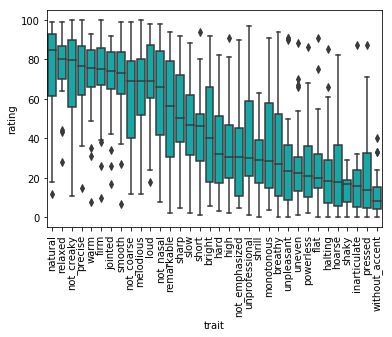

In [18]:
# sorting by columns median
ratings_VD_alrayyan = ratings_VD_alrayyan.reindex_axis(ratings_VD_alrayyan.iloc[:,15:].median().sort_values(ascending=False).index, axis=1)
  
# extracting ratings to each interpersonal trait (reshaping for plot)
traits = list(ratings_VD_alrayyan)
ratings_VD_alrayyan_melt = pd.melt(ratings_VD_alrayyan, id_vars=['listener_pseudonym'], value_vars=traits)
ratings_VD_alrayyan_melt.columns = ['listener_pseudonym','trait','rating']
 
# create plot
plot_alrayyan = sns.boxplot(data = ratings_VD_alrayyan_melt, x = "trait", y = "rating", color="c")
plot_alrayyan.set_xticklabels(traits,rotation=90);
plt.show()

As sone for SC ratings, I will compute the mean across listeners for each VD rating.

In [19]:
# just keep speaker ID, gender, WAAT class, and rating in the dataframe

# extract speaker ID from sample_heard
ratings_tmp = pd.concat([ratings_VD.iloc[:,[5,7,14]], ratings_SC.iloc[:,15:]], axis = 1)
 
# aggregate ratings by median for each trait separately
ratings_VD_means = ratings_tmp.groupby(['speaker_ID','speaker_gender','speaker_highlow_SC']).agg('mean')
ratings_VD_medians = ratings_tmp.groupby(['speaker_ID','speaker_gender','speaker_highlow_SC']).agg('median')
ratings_VD_std = ratings_tmp.groupby(['speaker_ID','speaker_gender','speaker_highlow_SC']).agg('std')
 
ratings_VD_means.head()

,,,distant,bored,emotional,not_irritated,active,pleasant,characterless,sociable,relaxed,affectionate,...,friendly,masculine,submissive,indifferent,interesting,cynical,artificial,intelligent,childish,modest
speaker_ID,speaker_gender,speaker_highlow_SC,,,,,,,,,,,,,,,,,,,,,
8.0,w,high,51.346154,41.692308,43.038462,65.884615,57.423077,59.000000,43.692308,45.307692,66.307692,52.730769,...,61.115385,50.576923,57.423077,43.115385,49.269231,38.423077,46.307692,60.423077,32.653846,57.538462
40.0,w,high,43.576923,40.230769,49.461538,62.038462,56.500000,52.269231,38.346154,50.192308,58.115385,46.961538,...,57.576923,51.615385,52.000000,44.269231,49.884615,43.615385,43.461538,59.192308,41.000000,50.576923
41.0,m,high,55.923077,44.038462,47.807692,66.500000,56.269231,61.769231,47.884615,43.923077,64.115385,50.230769,...,64.615385,54.461538,58.461538,53.576923,46.230769,41.115385,40.961538,56.538462,34.307692,60.423077
61.0,m,high,50.846154,40.884615,54.615385,69.692308,54.807692,59.807692,43.961538,51.384615,52.115385,55.923077,...,64.653846,33.153846,59.230769,47.153846,45.692308,38.115385,41.346154,56.769231,43.846154,62.192308
71.0,m,high,42.769231,40.307692,42.884615,72.115385,56.153846,58.000000,50.346154,44.192308,57.153846,50.038462,...,69.307692,45.384615,59.115385,42.423077,46.923077,42.615385,39.884615,53.346154,40.769231,56.961538


In [ ]:
# TODO in another notebook: relationships between SC and VD

# - plots: ratings VD retated to high/low WAAT for each VD, for each gender
# - linear models with PLS -> from VD to SC

### What's next

* predict interpersonal traits from speech features
* predict voice descriptions from speech features
* examine the performance of different classification and regression algorithms